# Центральная предельная теорема своими руками

## Гамма-распределение

Гамма-распределение $\Gamma(k, \theta)$ - двухпараметрическое непрерывное распределение с коэффициентами формы $k$ и масштаба $\theta$ ([Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution)).

В модуле $scipy.stats$ реализовано гамма-распределение только с учетом коэффициента формы, коэффициент масштаба $\theta$ принят за 1 ([SciPy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)). Поэтому сгенерируем выборку объёма 1000 из гамма-распределения с параметром $k = 8$:

In [16]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

k = 8
theta = 1
gamma = sts.gamma(k)
sample = gamma.rvs(1000)

Гистограмма выборки и график теоретической функции плотности распределения.

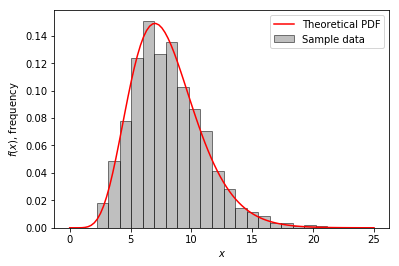

In [17]:
# Histogram
plt.hist(sample, bins=20, normed=True, edgecolor='k', color='grey', alpha = 0.5, label='Sample data')
plt.ylabel('$f(x)$, frequency')
plt.xlabel('$x$')

# PDF
x = np.linspace(0,25,100)
pdf = gamma.pdf(x)
plt.plot(x, pdf, 'r', label='Theoretical PDF')
plt.legend(loc='upper right')


## Оценка распределения выборочного среднего гамма-распределения при разных объёмах выборок

Из гамма-распределения генерируем выборку объема $n$ = 5 и вычисляем среднее значение. Данное действие повторяем 1000 раз и получаем вектор из 1000 выборочных средних. Затем получаем аналогичные векторы для $n$ = 10 и $n$ = 50.

In [18]:
# Create a list of 1000 means.
sample_n5 = [np.mean(gamma.rvs(size=5)) for i in range(1000)]
sample_n10 = [np.mean(gamma.rvs(size=10)) for i in range(1000)]
sample_n50 = [np.mean(gamma.rvs(size=50)) for i in range(1000)]

Определяем теоретические значения математического ожидания $\mu = k * \theta$ и дисперсии $D = k * \theta^2$ исходного гамма-распределения.

In [19]:
# Theretical mean and variance of means distribution
mu = k * theta
D = k * theta**2

Расчёты математического ожидания и дисперсии средневыборочных для всех $n$ выполняются по формулам: 

$EX = mu$, $DX = D/n$

In [20]:
EX_n5 = EX_n10 = EX_n50 = mu
DX_n5 = D/5.
DX_n10 = D/10.
DX_n50 = D/50.
print 'Математическое ожидание:', mu
print 'Дисперсия при n = 5:', DX_n5
print 'Дисперсия при n = 10:', DX_n10
print 'Дисперсия при n = 50:', DX_n50

Математическое ожидание: 8
Дисперсия при n = 5: 1.6
Дисперсия при n = 10: 0.8
Дисперсия при n = 50: 0.16


Строим гистограммы распределений выборочных средних и графики функций плотности вероятности нормальных распределений.

Text(0,0.5,u'$f(x)$')

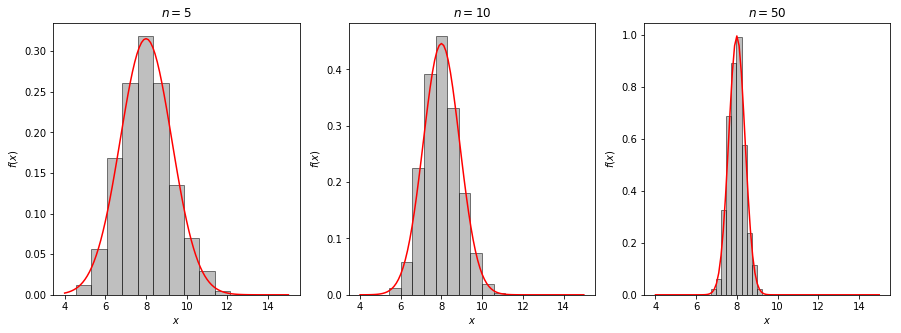

In [21]:
plt.figure(figsize=(15,5))
x = np.linspace(4,15,100)

# Histogram
plt.subplot(131)
plt.hist(sample_n5, bins=10, normed=True, edgecolor='k', color='grey', alpha=0.5)
plt.plot(x, sts.norm.pdf(x, EX_n5, np.sqrt(DX_n5)), color='r')
plt.title('$n = 5$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.subplot(132)
plt.hist(sample_n10, bins=10, normed=True, edgecolor='k', color='grey', alpha=0.5)
plt.plot(x, sts.norm.pdf(x, EX_n10, np.sqrt(DX_n10)), color='r')
plt.title('$n = 10$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.subplot(133)
plt.hist(sample_n50, bins=10, normed=True, edgecolor='k', color='grey', alpha=0.5)
plt.plot(x, sts.norm.pdf(x, EX_n50, np.sqrt(DX_n50)), color='r')
plt.title('$n = 50$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


При объеме выборки $n$ = 5 гистограмма выборочных средних довольно точно совпадает с теоретической функцией плотности вероятности. Имеются лишь отдельные выбросы. С увеличением объема выборки разброс значений случайной величины сокращается, ширина гистограммы и плотности распределения синхронно уменьшаются. При $n$ = 50 аппроксимация становится очень точной. 

## Выводы
Центральная предельная теорема пригодна для гамма-распределения.